In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [164]:
def pre_price_deal(dataframe,name):
    dataframe.apply(pd.to_numeric)
    dataframe['block']=name
    dataframe.columns=['price','price_m2','m2','block']
    return dataframe

# 预处理数据使小组各个来源的数据具有相同格式

In [165]:
def pre_rent_deal(dataframe,name):
    dataframe.apply(pd.to_numeric)
    dataframe['block']=name
    dataframe.columns=['rent','m2','block']
    return dataframe

# 预处理数据使小组各个来源的数据具有相同格式

In [52]:
esf_shahe=pd.read_csv("esf_changping_shahe.csv")
esf_shahe=pre_price_deal(esf_shahe,'ShaHe')
esf_shahe.describe()

,price,price_m2,m2
count,701.000000,701.000000,701.000000
mean,1623.238944,49843.318117,253.012739
std,3854.983003,23226.919156,302.636074
min,115.000000,18330.000000,18.060000
25%,285.000000,35435.000000,78.170000
50%,520.000000,40476.000000,124.030000
75%,2248.000000,57589.000000,358.690000
max,89600.000000,205423.000000,5500.000000


In [53]:
esf_huilongguan=pd.read_csv("esf_changping_huilongguan.csv")
esf_huilongguan=pre_price_deal(esf_huilongguan,'HuiLongGuan')
esf_huilongguan.describe()

,price,price_m2,m2
count,643.000000,643.000000,643.000000
mean,617.487076,50117.668740,123.846050
std,467.579695,11566.886717,81.384454
min,105.000000,23333.000000,32.210000
25%,429.000000,41682.000000,89.705000
50%,518.000000,48855.000000,102.590000
75%,649.000000,59026.000000,129.770000
max,6500.000000,95574.000000,1162.000000


In [54]:
esf_huoying=pd.read_csv("priceHuoying.csv")
esf_huoying=pre_price_deal(esf_huoying,'HuoYing')
esf_huoying.describe()

,price,price_m2,m2
count,81.000000,81.000000,81.000000
mean,472.430864,49594.160494,94.597778
std,169.865696,9824.447919,23.829342
min,209.000000,29036.000000,43.690000
25%,359.000000,42147.000000,85.400000
50%,410.000000,45388.000000,89.980000
75%,540.000000,57608.000000,105.620000
max,935.000000,67582.000000,164.800000


In [55]:
esf_tiantongyuan=pd.read_excel("price_tiantongyuan.xlsx")
esf_tiantongyuan=pre_price_deal(esf_tiantongyuan,'TianTongYuan')
esf_tiantongyuan.describe()

,price,price_m2,m2
count,1200.000000,1200.000000,1200.000000
mean,511.678333,35102.744167,148.208092
std,258.552392,7490.902642,56.656970
min,155.000000,18513.000000,45.010000
25%,365.000000,29952.500000,103.290000
50%,449.500000,34457.000000,141.805000
75%,569.250000,38855.500000,175.305000
max,2380.000000,86605.000000,548.700000


In [56]:
zu_shahe=pd.read_csv("zu_changping_shahe.csv")
zu_shahe=pre_rent_deal(zu_shahe,'ShaHe')
zu_shahe.describe()

,rent,m2
count,452.000000,452.000000
mean,6948.756637,138.384956
std,11455.183183,329.657549
min,1000.000000,12.000000
25%,3000.000000,60.000000
50%,4000.000000,80.000000
75%,5000.000000,99.000000
max,120000.000000,4375.000000


In [57]:
zu_huilongguan=pd.read_csv("zu_changping_huilongguan.csv")
zu_huilongguan=pre_rent_deal(zu_huilongguan,'HuiLongGuan')
zu_huilongguan.describe()

,rent,m2
count,377.000000,377.000000
mean,4323.217507,68.206897
std,3794.654656,72.028841
min,1000.000000,8.000000
25%,1850.000000,20.000000
50%,3400.000000,58.000000
75%,5500.000000,90.000000
max,28000.000000,681.000000


In [58]:
zu_huoying=pd.read_csv("rentHuoying.csv")
zu_huoying=pre_rent_deal(zu_huoying,'HuoYing')
zu_huoying.describe()

,rent,m2
count,46.000000,46.000000
mean,3068.695652,45.673913
std,1782.161744,33.166284
min,1000.000000,8.000000
25%,1500.000000,16.250000
50%,2250.000000,25.000000
75%,4800.000000,72.500000
max,6500.000000,120.000000


In [59]:
zu_tiantongyuan=pd.read_excel("renttiantongyuan.xlsx")
zu_tiantongyuan=pre_rent_deal(zu_tiantongyuan,'TianTongYuan')
zu_tiantongyuan.describe()

,rent,m2
count,115.000000,115.000000
mean,3195.982609,51.513043
std,1710.607443,40.931986
min,1150.000000,8.000000
25%,1800.000000,18.000000
50%,2350.000000,28.000000
75%,4950.000000,91.500000
max,7900.000000,160.000000


In [60]:
esf_changping=pd.concat([esf_shahe,esf_huilongguan,esf_huoying,esf_tiantongyuan])
median_price=esf_changping.groupby('block').median()
median_price

# 计算每平米房价中位数

,price,price_m2,m2
block,,,
HuiLongGuan,518.0,48855.0,102.590
HuoYing,410.0,45388.0,89.980
ShaHe,520.0,40476.0,124.030
TianTongYuan,449.5,34457.0,141.805


In [61]:
zu_changping=pd.concat([zu_shahe,zu_huilongguan,zu_huoying,zu_tiantongyuan])
median_rent=zu_changping.groupby('block').median()
median_rent

# 计算每平米月租金中位数

,rent,m2
block,,
HuiLongGuan,3400.0,58.0
HuoYing,2250.0,25.0
ShaHe,4000.0,80.0
TianTongYuan,2350.0,28.0


In [62]:
Ratio=pd.DataFrame()
Ratio['ratio']=median_price['price_m2']/(median_rent['rent']/median_rent['m2'])
Ratio['ratio']=round(Ratio['ratio'],2)
Ratio

# 计算各街区租金比

,ratio
block,
HuiLongGuan,833.41
HuoYing,504.31
ShaHe,809.52
TianTongYuan,410.55


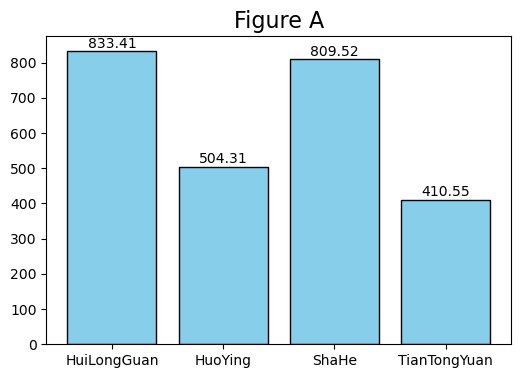

In [133]:
plt.figure(figsize=(6, 4))
labels=['HuiLongGuan','HuoYing','ShaHe','TianTongYuan']

bars=plt.bar(labels, Ratio['ratio'], color='skyblue', edgecolor='black')
plt.title('Figure A', fontsize=16)

for bar in bars:
    y=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y+1, y,ha='center', va='bottom')

# 用原始数据的中位数计算租金比

In [147]:
esf=pd.get_dummies(esf_changping,columns=['block'],drop_first=True)
esf

for col in esf.columns:
    if col.startswith('block_'):  # 对每个虚拟变量创建交互项
        interaction_term = f'm2_{col}'
        esf[interaction_term] = esf['m2'] * esf[col]
esf

# 构建回归模型

,price,price_m2,m2,block_HuoYing,block_ShaHe,block_TianTongYuan,m2_block_HuoYing,m2_block_ShaHe,m2_block_TianTongYuan
0,3800.00,66666,570.00,False,True,False,0.00,570.00,0.00
1,3800.00,51387,739.48,False,True,False,0.00,739.48,0.00
2,8000.00,105517,758.17,False,True,False,0.00,758.17,0.00
3,2200.00,92495,237.85,False,True,False,0.00,237.85,0.00
4,3300.00,91412,361.00,False,True,False,0.00,361.00,0.00
...,...,...,...,...,...,...,...,...,...
1195,320.00,28084,146.00,False,False,True,0.00,0.00,146.00
1196,360.00,32062,140.08,False,False,True,0.00,0.00,140.08
1197,369.00,40304,266.19,False,False,True,0.00,0.00,266.19
1198,380.00,33591,285.00,False,False,True,0.00,0.00,285.00


In [148]:
for col in esf.columns:
    if esf[col].dtype == 'bool':  
        esf[col] = esf[col].astype(int)  
#将虚拟变量的数据类型变为int

X=esf.drop(columns=['price_m2','price'])
Y=esf['price_m2']


X=sm.add_constant(X)
model1=sm.OLS(Y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               price_m2   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     208.9
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          7.90e-247
Time:                        16:46:42   Log-Likelihood:                -28573.
No. Observations:                2625   AIC:                         5.716e+04
Df Residuals:                    2617   BIC:                         5.721e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.072e+

In [149]:
predict_esf1={
    'const':[1,1,1,1],
    'm2':[50,50,50,50],  
    'block_HuoYing':[0,1,0,0],  
    'block_ShaHe':[0,0,1,0],  
    'block_TianTongYuan':[0,0,0,1],  
    'm2_block_HuoYing':[0,50,0,0],  
    'm2_block_ShaHe':[0,0,50,0],  
    'm2_block_TianTongYuan':[0,0,0,50]
}

predictdf_esf1=pd.DataFrame(predict_esf1)
print(predictdf_esf1)
predictions11=model1.predict(predictdf_esf1)
predictions11

# 预测50平米房子的每平米价格

   const  m2  block_HuoYing  block_ShaHe  block_TianTongYuan  \
0      1  50              0            0                   0   
1      1  50              1            0                   0   
2      1  50              0            1                   0   
3      1  50              0            0                   1   

   m2_block_HuoYing  m2_block_ShaHe  m2_block_TianTongYuan  
0                 0               0                      0  
1                50               0                      0  
2                 0              50                      0  
3                 0               0                     50  


0   50475.70
1   46988.58
2   41805.03
3   34596.42
dtype: float64

In [150]:
predict_esf2={
    'const':[1,1,1,1],
    'm2':[100,100,100,100],  
    'block_HuoYing':[0,1,0,0],  
    'block_ShaHe':[0,0,1,0],  
    'block_TianTongYuan':[0,0,0,1],  
    'm2_block_HuoYing':[0,100,0,0],  
    'm2_block_ShaHe':[0,0,100,0],  
    'm2_block_TianTongYuan':[0,0,0,100]
}

predictdf_esf2=pd.DataFrame(predict_esf2)
print(predictdf_esf2)
predictions12=model1.predict(predictdf_esf2)
predictions12

# 预测100平米房子的每平米价格

   const   m2  block_HuoYing  block_ShaHe  block_TianTongYuan  \
0      1  100              0            0                   0   
1      1  100              1            0                   0   
2      1  100              0            1                   0   
3      1  100              0            0                   1   

   m2_block_HuoYing  m2_block_ShaHe  m2_block_TianTongYuan  
0                 0               0                      0  
1               100               0                      0  
2                 0             100                      0  
3                 0               0                    100  


0   50233.28
1   49909.78
2   43784.78
3   34854.20
dtype: float64

In [151]:
zu=pd.get_dummies(zu_changping,columns=['block'],drop_first=True)
zu['rent_m2']=zu['rent']/zu['m2']

for col in esf.columns:
    if col.startswith('block_'):  # 对每个虚拟变量创建交互项
        interaction_term = f'm2_{col}'
        zu[interaction_term] = zu['m2'] * zu[col]
zu

,rent,m2,block_HuoYing,block_ShaHe,block_TianTongYuan,rent_m2,m2_block_HuoYing,m2_block_ShaHe,m2_block_TianTongYuan
0,2300,36,False,True,False,63.89,0,36,0
1,1050,18,False,True,False,58.33,0,18,0
2,1200,18,False,True,False,66.67,0,18,0
3,22000,233,False,True,False,94.42,0,233,0
4,25000,385,False,True,False,64.94,0,385,0
...,...,...,...,...,...,...,...,...,...
110,1450,15,False,False,True,96.67,0,0,15
111,5200,96,False,False,True,54.17,0,0,96
112,5100,106,False,False,True,48.11,0,0,106
113,2350,25,False,False,True,94.00,0,0,25


In [152]:
for col in zu.columns:
    if zu[col].dtype == 'bool':  
        zu[col] = zu[col].astype(int)  
#将虚拟变量的数据类型变为int

X=zu.drop(columns=['rent','rent_m2'])
Y=zu['rent_m2']


X=sm.add_constant(X)
model2=sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                rent_m2   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     78.23
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           3.91e-90
Time:                        16:46:45   Log-Likelihood:                -5015.3
No. Observations:                 990   AIC:                         1.005e+04
Df Residuals:                     982   BIC:                         1.009e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   100.87

In [153]:
predict_zu1={
    'const':[1,1,1,1],
    'm2':[50,50,50,50],  
    'block_HuoYing':[0,1,0,0],  
    'block_ShaHe':[0,0,1,0],  
    'block_TianTongYuan':[0,0,0,1],  
    'm2_block_HuoYing':[0,50,0,0],  
    'm2_block_ShaHe':[0,0,50,0],  
    'm2_block_TianTongYuan':[0,0,0,50]
}

predictdf_zu1=pd.DataFrame(predict_zu1)
print(predictdf_zu1)
predictions21=model2.predict(predictdf_zu1)
predictions21

# 预测50平米房子的每平米月租金

   const  m2  block_HuoYing  block_ShaHe  block_TianTongYuan  \
0      1  50              0            0                   0   
1      1  50              1            0                   0   
2      1  50              0            1                   0   
3      1  50              0            0                   1   

   m2_block_HuoYing  m2_block_ShaHe  m2_block_TianTongYuan  
0                 0               0                      0  
1                50               0                      0  
2                 0              50                      0  
3                 0               0                     50  


0    87.87
1    82.15
2    56.88
3   107.80
dtype: float64

In [154]:
predict_zu2={
    'const':[1,1,1,1],
    'm2':[100,100,100,100],  
    'block_HuoYing':[0,1,0,0],  
    'block_ShaHe':[0,0,1,0],  
    'block_TianTongYuan':[0,0,0,1],  
    'm2_block_HuoYing':[0,100,0,0],  
    'm2_block_ShaHe':[0,0,100,0],  
    'm2_block_TianTongYuan':[0,0,0,100]
}

predictdf_zu2=pd.DataFrame(predict_zu2)
print(predictdf_zu2)
predictions22=model2.predict(predictdf_zu2)
predictions22

# 预测100平米房子的每平米月租金

   const   m2  block_HuoYing  block_ShaHe  block_TianTongYuan  \
0      1  100              0            0                   0   
1      1  100              1            0                   0   
2      1  100              0            1                   0   
3      1  100              0            0                   1   

   m2_block_HuoYing  m2_block_ShaHe  m2_block_TianTongYuan  
0                 0               0                      0  
1               100               0                      0  
2                 0             100                      0  
3                 0               0                    100  


0   74.85
1   43.26
2   56.50
3   40.02
dtype: float64

In [159]:
predict_ratio=pd.DataFrame()
predict_ratio['50m2']=predictions11/predictions21
predict_ratio['100m2']=predictions12/predictions22
predict_ratio

# 预测租金比

,50m2,100m2
0,574.47,671.09
1,572.01,1153.75
2,734.99,775.01
3,320.92,870.96


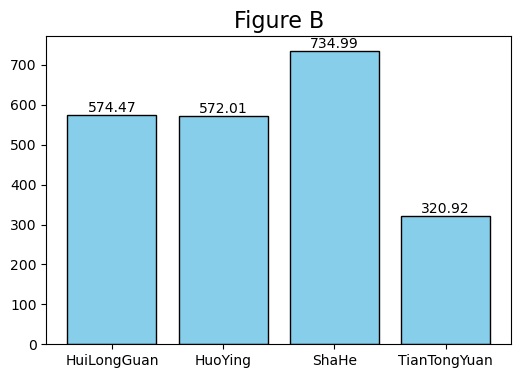

In [161]:
plt.figure(figsize=(6, 4))
labels=['HuiLongGuan','HuoYing','ShaHe','TianTongYuan']

bars=plt.bar(labels,predict_ratio['50m2'], color='skyblue', edgecolor='black')
plt.title('Figure B', fontsize=16)

for bar in bars:
    y=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y+1, round(y,2),ha='center', va='bottom')

# 50平米房子的租金比

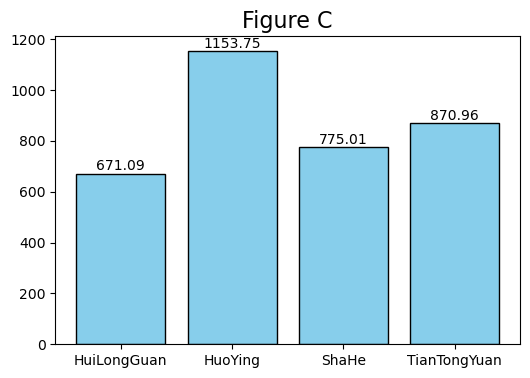

In [162]:
plt.figure(figsize=(6, 4))
labels=['HuiLongGuan','HuoYing','ShaHe','TianTongYuan']

bars=plt.bar(labels,predict_ratio['100m2'], color='skyblue', edgecolor='black')
plt.title('Figure C', fontsize=16)

for bar in bars:
    y=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y+1, round(y,2),ha='center', va='bottom')

# 100平米房子的租金比

相较于50平米的房子，100平米的房子普遍租金比更高，可能是大房子更多被用作自住房，小房子更多用于租赁市场引起的